### Dataset description

This dataset contains house sale prices for King County, which includes Seattle. Data includes homes sold between May 2014 and May 2015.

The dataset contains 21597 instances with 21 attributes.

Description attributes:
* **id**: Unique ID for each home sold
* **date**: Date of the home sale
* **price**: Price of each home sold
* **bedrooms**: Number of bedrooms
* **bathrooms**: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living**: Square footage of the apartments interior living space
* **sqft_lot**: Square footage of the land space
* **floors**: Number of floors
* **waterfront**: - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view**: An index from 0 to 4 of how good the view of the property was
* **condition**: - An index from 1 to 5 on the condition of the apartment,
* **grade**: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above**: The square footage of the interior housing space that is above ground level
* **sqft_basement**: The square footage of the interior housing space that is below ground level
* **yr_built**: The year the house was initially built
* **yr_renovated**: The year of the house’s last renovation **(attribute will be converted to a boolean value: "Was the house renovated? ")**
* **zipcode**: What zipcode area the house is in
* **lat**: Lattitude
* **long**: Longitude
* **sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors **(attribute will be omitted)**
* **sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors **(attribute will be omitted)**

### Import libraries

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

import sklearn.cluster, sklearn.metrics
import scipy.spatial

#### Load data to DataFrame.


In [8]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Simple data preprocessing
* set index to *id*
* convert *date* to datetime format
* custom boolean attribute *is_renovated*  ("Was the house renovated?")
* drop attributes [*sqft_living15* , *sqft_lot15*]

In [9]:
df.set_index('id', inplace = True)
df['date'] = pd.to_datetime(df['date'])
df.loc[df['yr_renovated'] == 0, 'is_renovated'] = False
df.loc[df['yr_renovated'] != 0, 'is_renovated'] = True
df.drop(['sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,is_renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,False
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,True
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,False
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,False
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,False


In [10]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
is_renovated             object
dtype: object

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


Check,  if the data doesn't contain any NULL value.

In [12]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
is_renovated     0
dtype: int64

## EDA
### Visualization of house price distribution

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


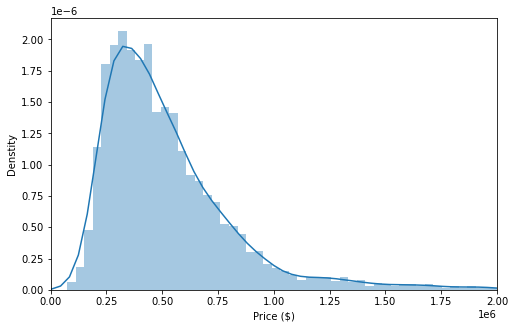

In [13]:
plt.figure(figsize=(8,5))
sns.distplot(df["price"], bins = 200)
plt.xlim(0,2000000)
plt.xlabel("Price ($)")
plt.ylabel("Denstity")
plt.show()

### Correlation matrix 

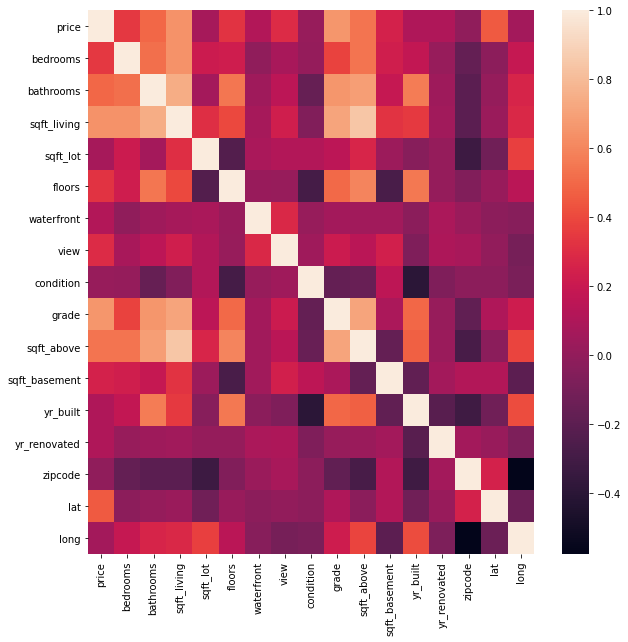

In [14]:
corr_metrix = df.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr_metrix)
plt.show()

### Visualization which attributes have a high correlation with price

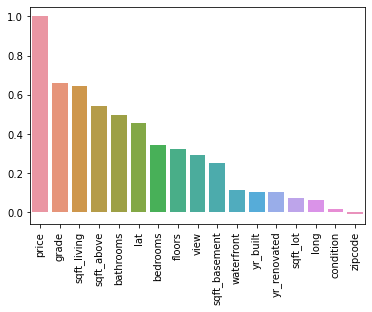

In [15]:
corr_price = df.corr(method='spearman')['price'].sort_values(ascending=False)
sns.barplot(x = corr_price.index, y = corr_price.array)
plt.xticks(rotation=90)
plt.show()

### Visualization of living space in relation to price 
Further was add color by number bathroom due to high correlation with price.

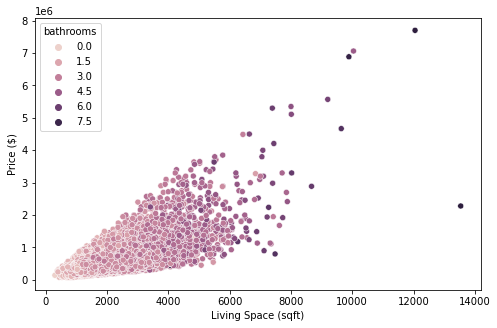

In [16]:
plt.figure(figsize=(8,5))
plot = sns.scatterplot(data=df, y='price', x='sqft_living', hue='bathrooms')
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.show()

With a growing living space, house prices are also rising. This trend also applies to the number of bathrooms.

### Visualization of which day of the week was houses sold most

In [17]:
df['day_of_week'] = df['date'].dt.dayofweek
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,is_renovated,day_of_week
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,False,0
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,True,1
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,False,2
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,False,1
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,False,2


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


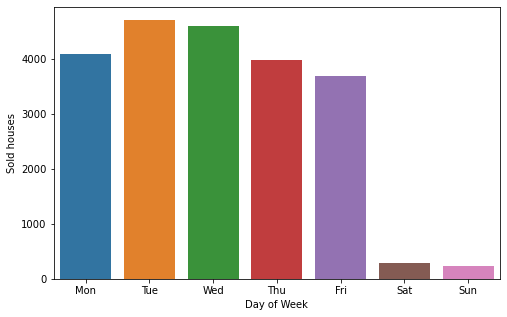

In [18]:
day_of_week_names = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun') 

plt.figure(figsize=(8,5))
sns.countplot(df['day_of_week'])
plt.xlabel('Day of Week')
plt.ylabel('Sold houses')
plt.xticks(np.arange(7),day_of_week_names)
plt.show()

As we expected, far fewer houses were sold over the weekend than on weekdays. The peak was on Tuesday and the following day number decreasing.

### Visualization of zip code location in relation to price

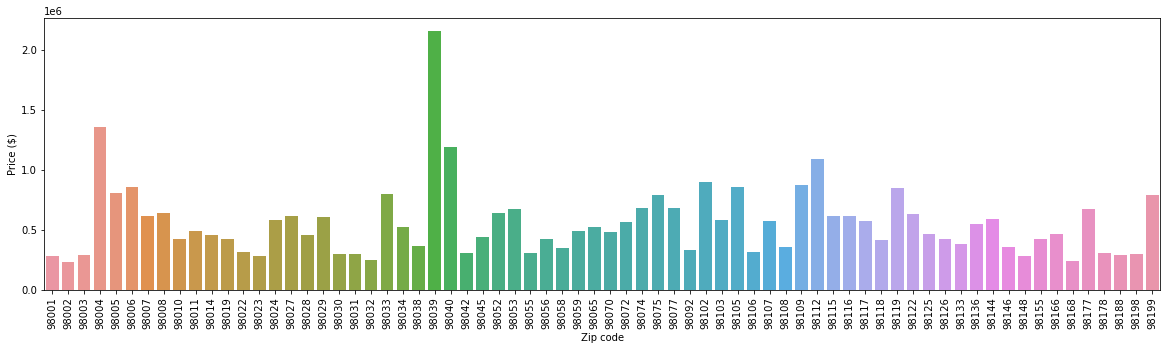

In [19]:
zip_price = df.groupby('zipcode').mean()['price']

plt.figure(figsize=(20,5))
sns.barplot(x = zip_price.index, y = zip_price.array)
plt.xticks(rotation=90)
plt.xlabel('Zip code')
plt.ylabel('Price ($)')
plt.show()

In [20]:
zip_price = df.groupby('zipcode').mean()['price'].sort_values(ascending=False)
zip_price

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
             ...     
98148    2.849086e+05
98001    2.808047e+05
98032    2.512962e+05
98168    2.403284e+05
98002    2.342840e+05
Name: price, Length: 70, dtype: float64

#### Find the most expensive and the cheapest based on zip code.
* the most expesnive location = 98039
* the cheapest location = 98002

### Comparison and visualization of two selected locations mentioned above.

In [21]:
df_high_price_by_zipcode = df.drop(["date"],axis = 1).loc[df["zipcode"] == 98039].mean()
df_low_price_by_zipcode = df.drop(["date"],axis = 1).loc[df["zipcode"] == 98002].mean()

df_compare = pd.concat([df_high_price_by_zipcode, df_low_price_by_zipcode], axis=1).rename(columns={0: '98039',1: '98002'})
df_compare.drop(["zipcode","lat","long","day_of_week","yr_renovated"], inplace = True)
df_compare

,98039,98002
price,2160606.60,234284.035176
bedrooms,4.06,3.326633
bathrooms,3.20,1.839196
sqft_living,3800.90,1627.743719
sqft_lot,17403.56,7517.633166
floors,1.56,1.334171
waterfront,0.02,0.000000
view,0.44,0.010050
condition,3.48,3.743719
grade,9.56,6.693467


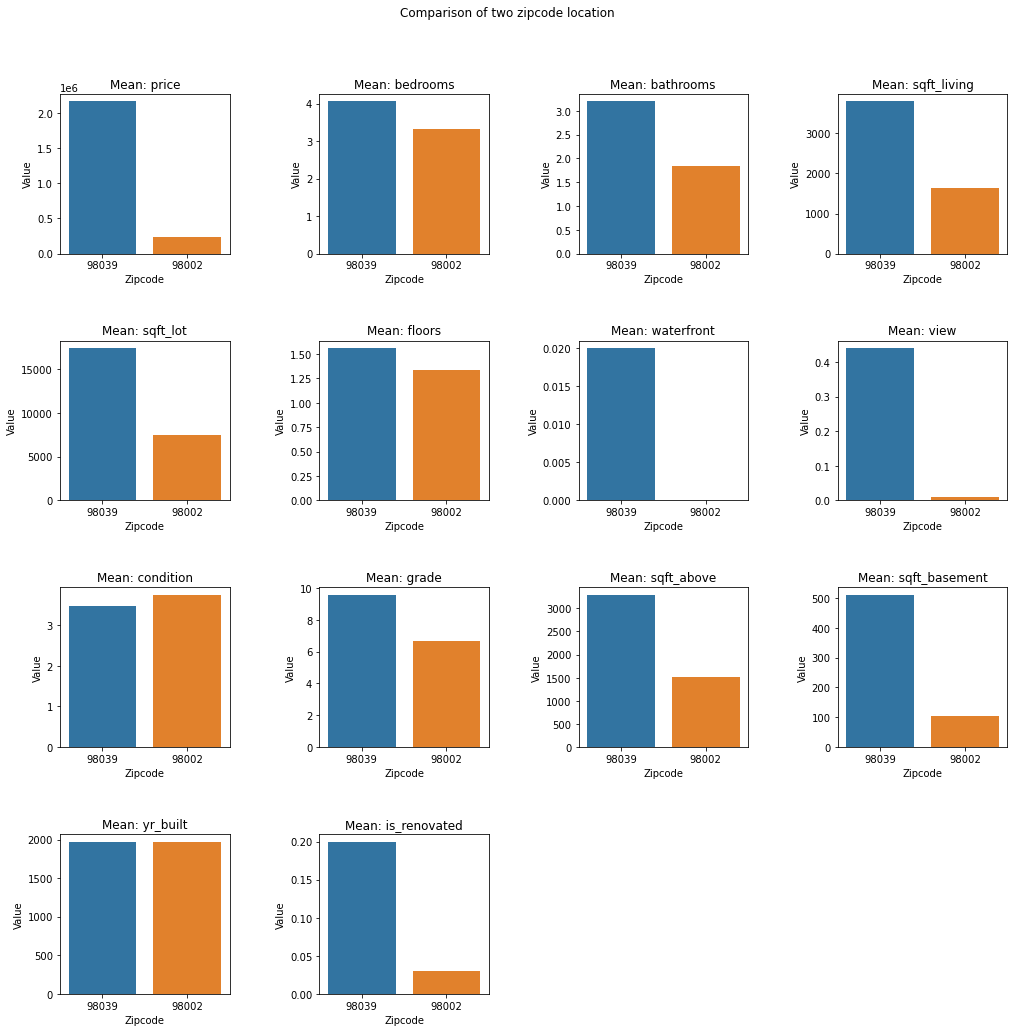

In [22]:
fig = plt.figure(figsize=(15,15))
fig.suptitle('Comparison of two zipcode location')
for i, item in enumerate(list(df_compare.index.values)):
    plt.subplot(4,4,i+1)
    tmp = pd.melt(df_compare.loc[[item]])
    sns.barplot(x = tmp["variable"], y = tmp["value"])
    plt.title(f"Mean: {item}")
    plt.xlabel('Zipcode')
    plt.ylabel('Value')

fig.tight_layout(pad=4.0)
plt.show()

As you can see in the graphs, most attributes are better for zipcode *98039*. Also, you can expect that region *98039* will be located on the coast, which may increase the price. Another important reason for the higher price may be a larger living space and land space. 

## Clustering

**Prices houses were categorized into 4 classes:**
* 0 - 321 999 = 1 (5404 instances)
* 322 000 - 450 999 = 2 (5464 instances)
* 451 000 - 644 999 = 3 (5332 instances)
* 645 000 and more = 4 (5413 instances)

In [23]:
df.loc[df['price'] <= 321999, 'price_cat'] = 1
df.loc[df['price'] >= 322000, 'price_cat'] = 2
df.loc[df['price'] >= 451000, 'price_cat'] = 3
df.loc[df['price'] >= 645000, 'price_cat'] = 4
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,is_renovated,day_of_week,price_cat
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,False,0,1.0
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,True,1,3.0
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,False,2,1.0
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,False,1,3.0
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,False,2,3.0


In [24]:
df['price_cat'].value_counts()

2.0    5464
4.0    5413
1.0    5404
3.0    5332
Name: price_cat, dtype: int64

In [25]:
df_clustering = df.drop(['date','price','yr_renovated','day_of_week','lat','long'],axis=1)
df_clustering.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,is_renovated,price_cat
id,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,False,1.0
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,True,3.0
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,False,1.0
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,False,3.0
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,False,3.0


Omitted some unnecessary or redundant attributes.

In [26]:
normalized_df = (df_clustering-df_clustering.min())/(df_clustering.max()-df_clustering.min())
normalized_df['price_cat'] = df_clustering['price_cat']
normalized_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,is_renovated,price_cat
id,,,,,,,,,,,,,,,
7129300520,0.090909,0.125,0.06717,0.003108,0.0,0.0,0.0,0.5,0.5,0.097588,0.0,0.478261,0.893939,0.0,1.0
6414100192,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.5,0.20614,0.082988,0.443478,0.626263,1.0,3.0
5631500400,0.060606,0.125,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.0,0.286957,0.136364,0.0,1.0
2487200875,0.121212,0.375,0.126038,0.002714,0.0,0.0,0.0,1.0,0.5,0.083333,0.188797,0.565217,0.681818,0.0,3.0
1954400510,0.090909,0.25,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.0,0.756522,0.368687,0.0,3.0


Data normalization to interval <0; 1>

In [27]:
normalized_df_no_target = normalized_df.drop('price_cat',axis = 1)

Create dataframe for clustering without target value.

#### K-Means clustering

In [28]:
clustering_scores = []
for k in range(2, 10):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(normalized_df_no_target)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(normalized_df_no_target, clustering.labels_)
    })
    
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores

,sse,silhouette
k,,
2,5408.011260,0.300373
3,4384.600733,0.289653
4,3547.545717,0.320040
5,3092.891473,0.333209
6,2799.476838,0.318112
7,2715.645680,0.269016
8,2446.499287,0.271300
9,2291.498611,0.276527


Run clustering using K-means algorithm, with K in range (2, 10). We stored SSE and silhouette score, to select the best K.

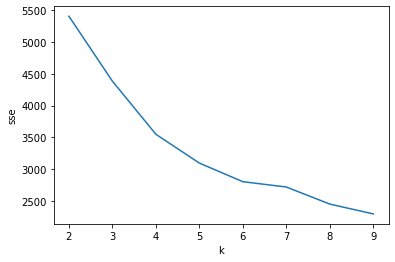

In [29]:
sns.lineplot(x = df_clustering_scores.index, y = df_clustering_scores['sse'])
plt.show()

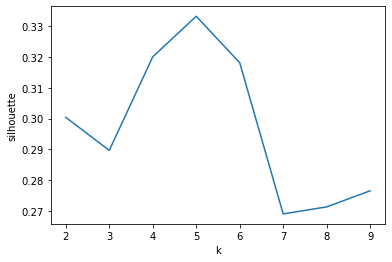

In [30]:
sns.lineplot(x= df_clustering_scores.index, y = df_clustering_scores['silhouette'])
plt.show()

The peak in silhouette score indicates the best K value should be 5. 

In [25]:
clustering = sklearn.cluster.KMeans(n_clusters=5).fit(normalized_df_no_target)
pd.Series(clustering.labels_).value_counts()

1    7492
0    6041
2    5810
4    1357
3     913
dtype: int64

In [26]:
normalized_df['k_means_clusters'] = pd.Series(index=normalized_df.index, data=clustering.labels_)
normalized_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,is_renovated,price_cat,k_means_clusters
id,,,,,,,,,,,,,,,,
7129300520,0.0909091,0.125,0.0671698,0.00310751,0,0,0,0.5,0.5,0.0975877,0,0.478261,0.893939,0,1.0,0
6414100192,0.0909091,0.28125,0.172075,0.00407187,0.4,0,0,0.5,0.5,0.20614,0.0829876,0.443478,0.626263,1,3.0,3
5631500400,0.0606061,0.125,0.0362264,0.00574253,0,0,0,0.5,0.416667,0.0526316,0,0.286957,0.136364,0,1.0,2
2487200875,0.121212,0.375,0.126038,0.00271377,0,0,0,1,0.5,0.0833333,0.188797,0.565217,0.681818,0,3.0,0
1954400510,0.0909091,0.25,0.104906,0.00457949,0,0,0,0.5,0.583333,0.152412,0,0.756522,0.368687,0,3.0,2


Add cluster number to dataframe. 

In [27]:
normalized_df['id'] = normalized_df.index
df_tmp_count = normalized_df.groupby(['k_means_clusters', 'price_cat']).id.count().reset_index(name='count')
df_tmp_count

,k_means_clusters,price_cat,count
0,0,1.0,1691
1,0,2.0,1766
2,0,3.0,1551
3,0,4.0,1033
4,1,1.0,1141
5,1,2.0,1962
6,1,3.0,2046
7,1,4.0,2343
8,2,1.0,2388
9,2,2.0,1449


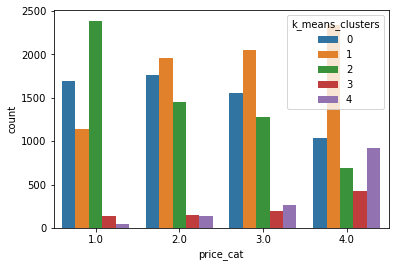

In [28]:
sns.barplot(data=df_tmp_count , x='price_cat', y='count', hue='k_means_clusters')

As you can see, each of the clusters is connected or affected by *price_cat* .  


The green cluster represents mostly cheaper houses. On other hand, the purple, red, and orange clusters mostly represent the class of more expensive houses. The blue cluster is a bit specific due to a peak in the second price category. Let's look at a visualization for each attribute in the data frame.

In [29]:
normalized_df["constant"] = "Data"

Was created a temporary attribute for visualization.

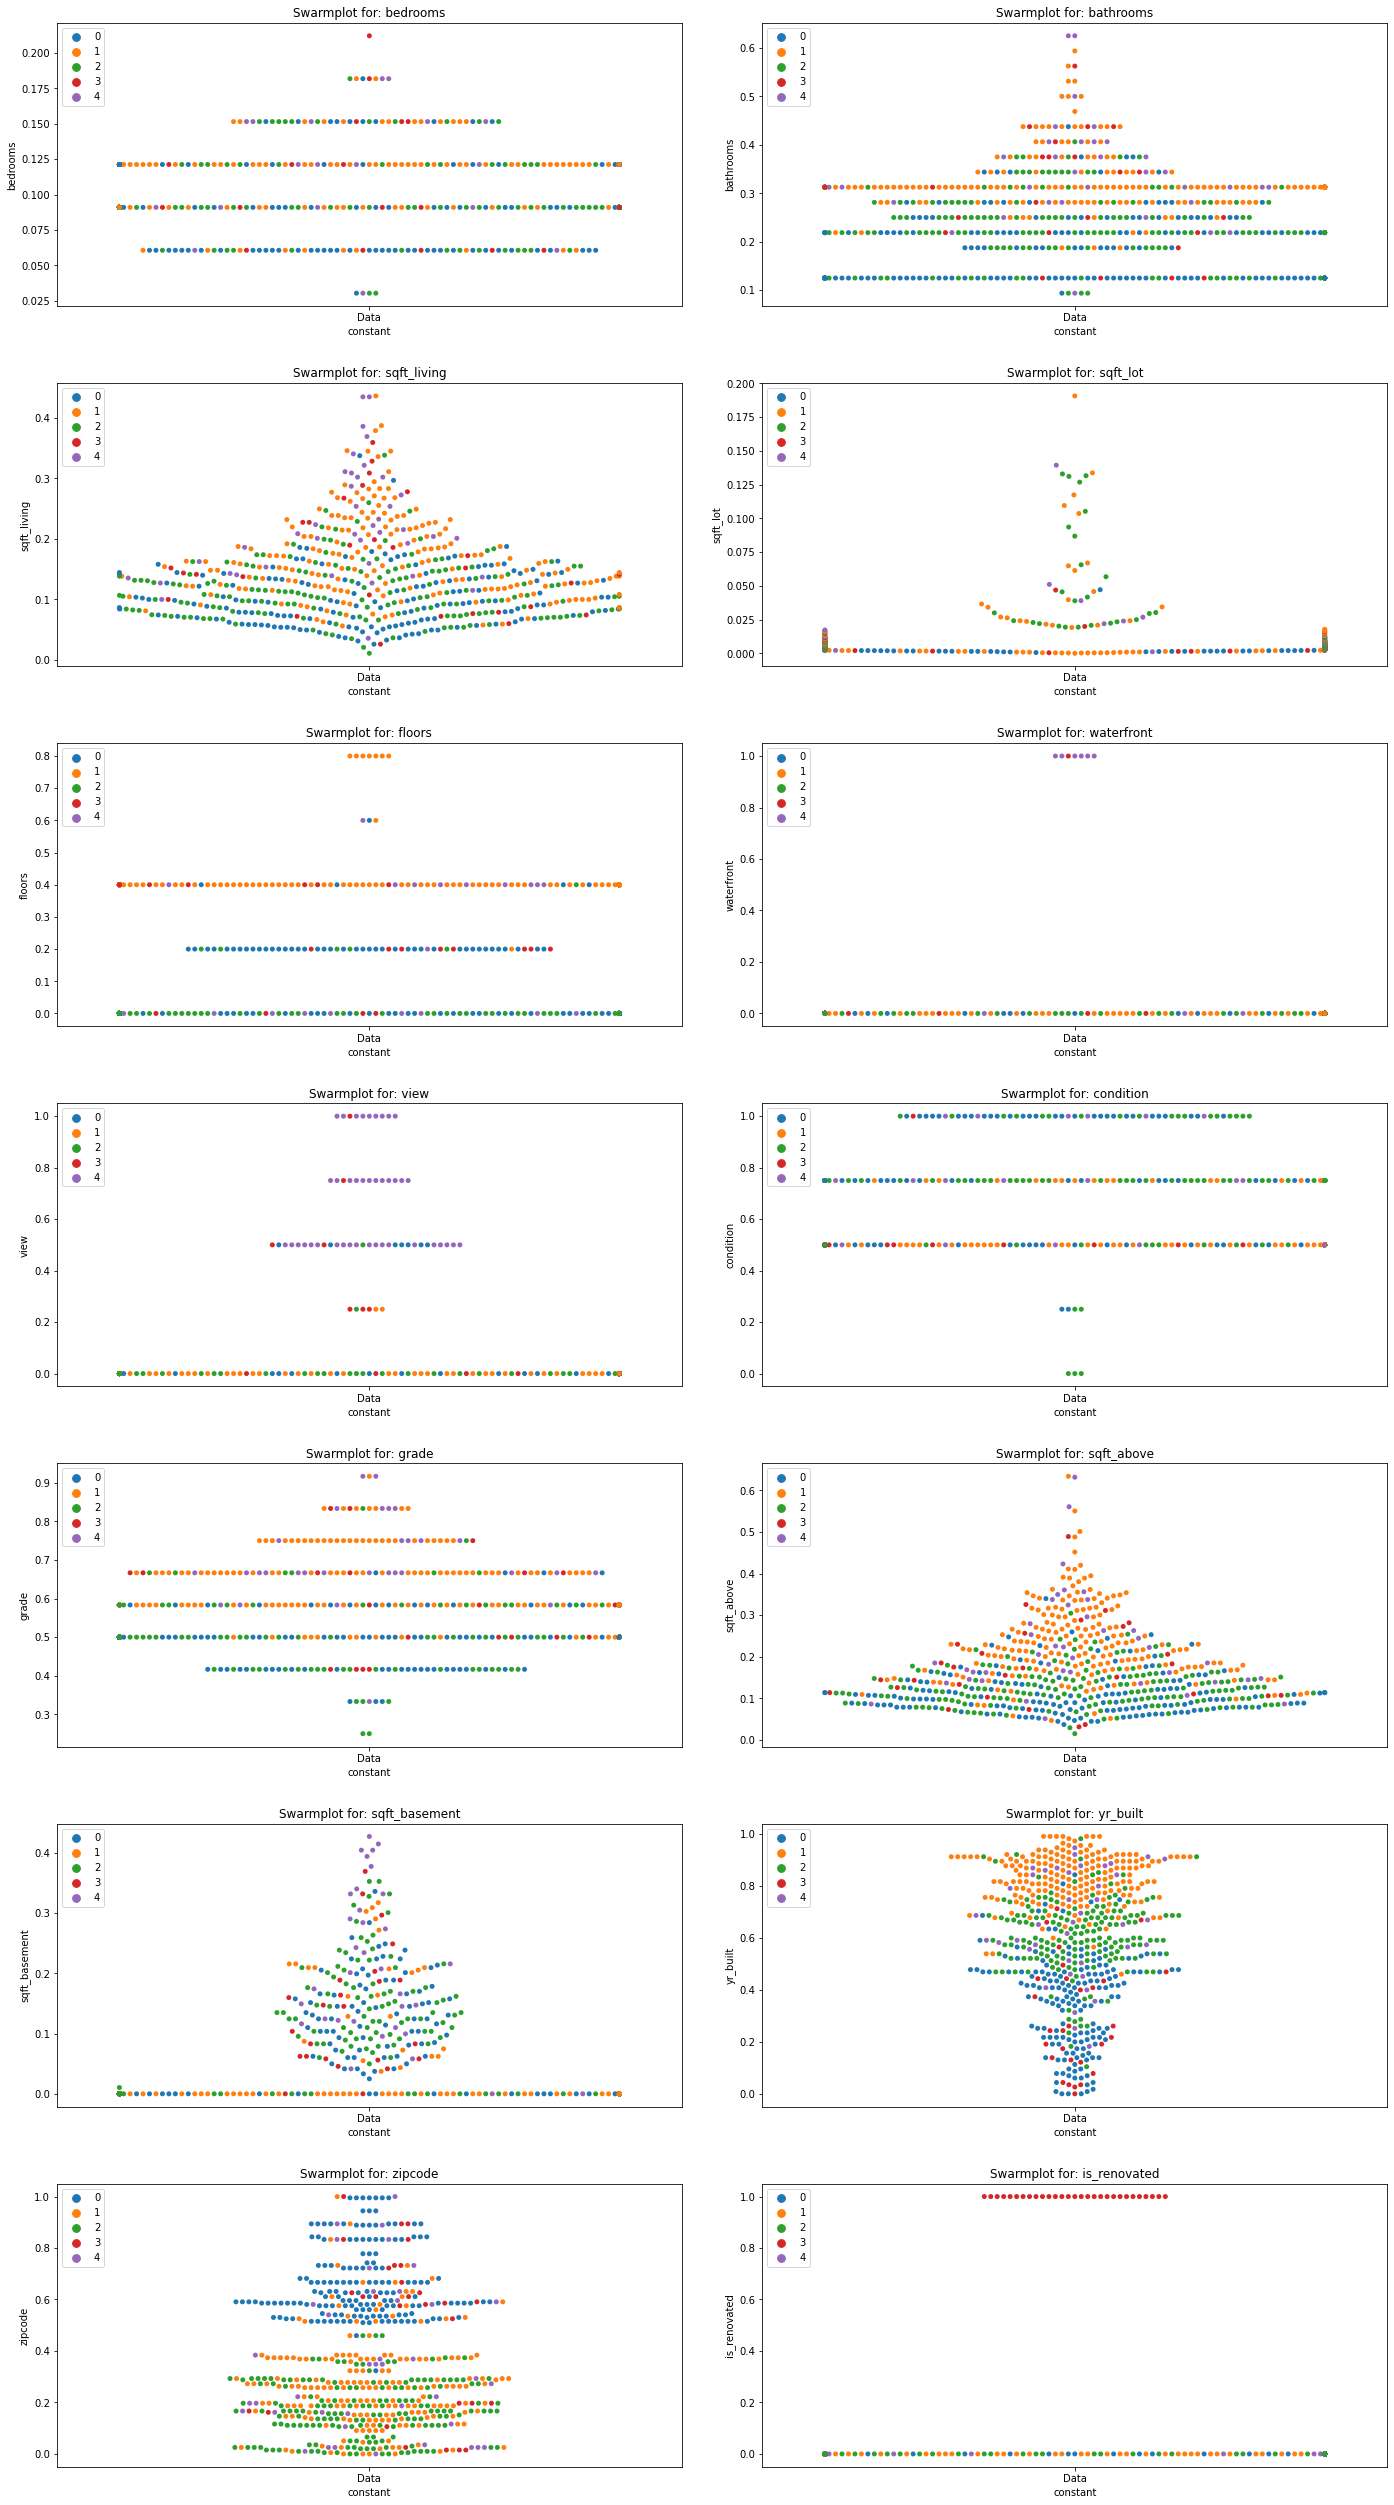

In [30]:
fig = plt.figure(figsize=(20,40))
number_sample = 600
not_used_collumns = ['constant', 'price_cat', 'k_means_clusters', 'id']
values = normalized_df.drop(not_used_collumns, axis=1).columns
for i,item in enumerate(values):
    plt.subplot(8,2,i+1)
    sns.swarmplot(x=normalized_df['constant'][:number_sample], y=normalized_df[item][:number_sample], hue=normalized_df['k_means_clusters'][:number_sample])
    plt.title(f"Swarmplot for: {item}")
    plt.legend(loc='upper left')

fig.tight_layout(pad=3.0)
plt.show()

Only a sample of data was used for visualization. 

For each attribute is nicely seen, grouping clusterss.

#### Agglomerative clustering

In [31]:
clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=5)
clustering.fit(normalized_df_no_target)
normalized_df['agglomerative_clusters'] = pd.Series(index=normalized_df.index, data=clustering.labels_)
normalized_df['agglomerative_clusters'].value_counts()

0    7404
4    5778
2    5684
1    1873
3     874
Name: agglomerative_clusters, dtype: int64

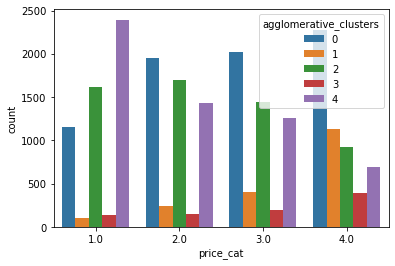

In [32]:
df_tmp_count = normalized_df.groupby(['agglomerative_clusters', 'price_cat']).id.count().reset_index(name='count')
sns.barplot(data=df_tmp_count , x='price_cat', y='count', hue='agglomerative_clusters')
plt.show()

The clustering looks similar to the previous k-means clustering. The purple and green clusters represent mostly cheaper houses. The blue, orange and red clusters predominantly represent more expensive houses. 

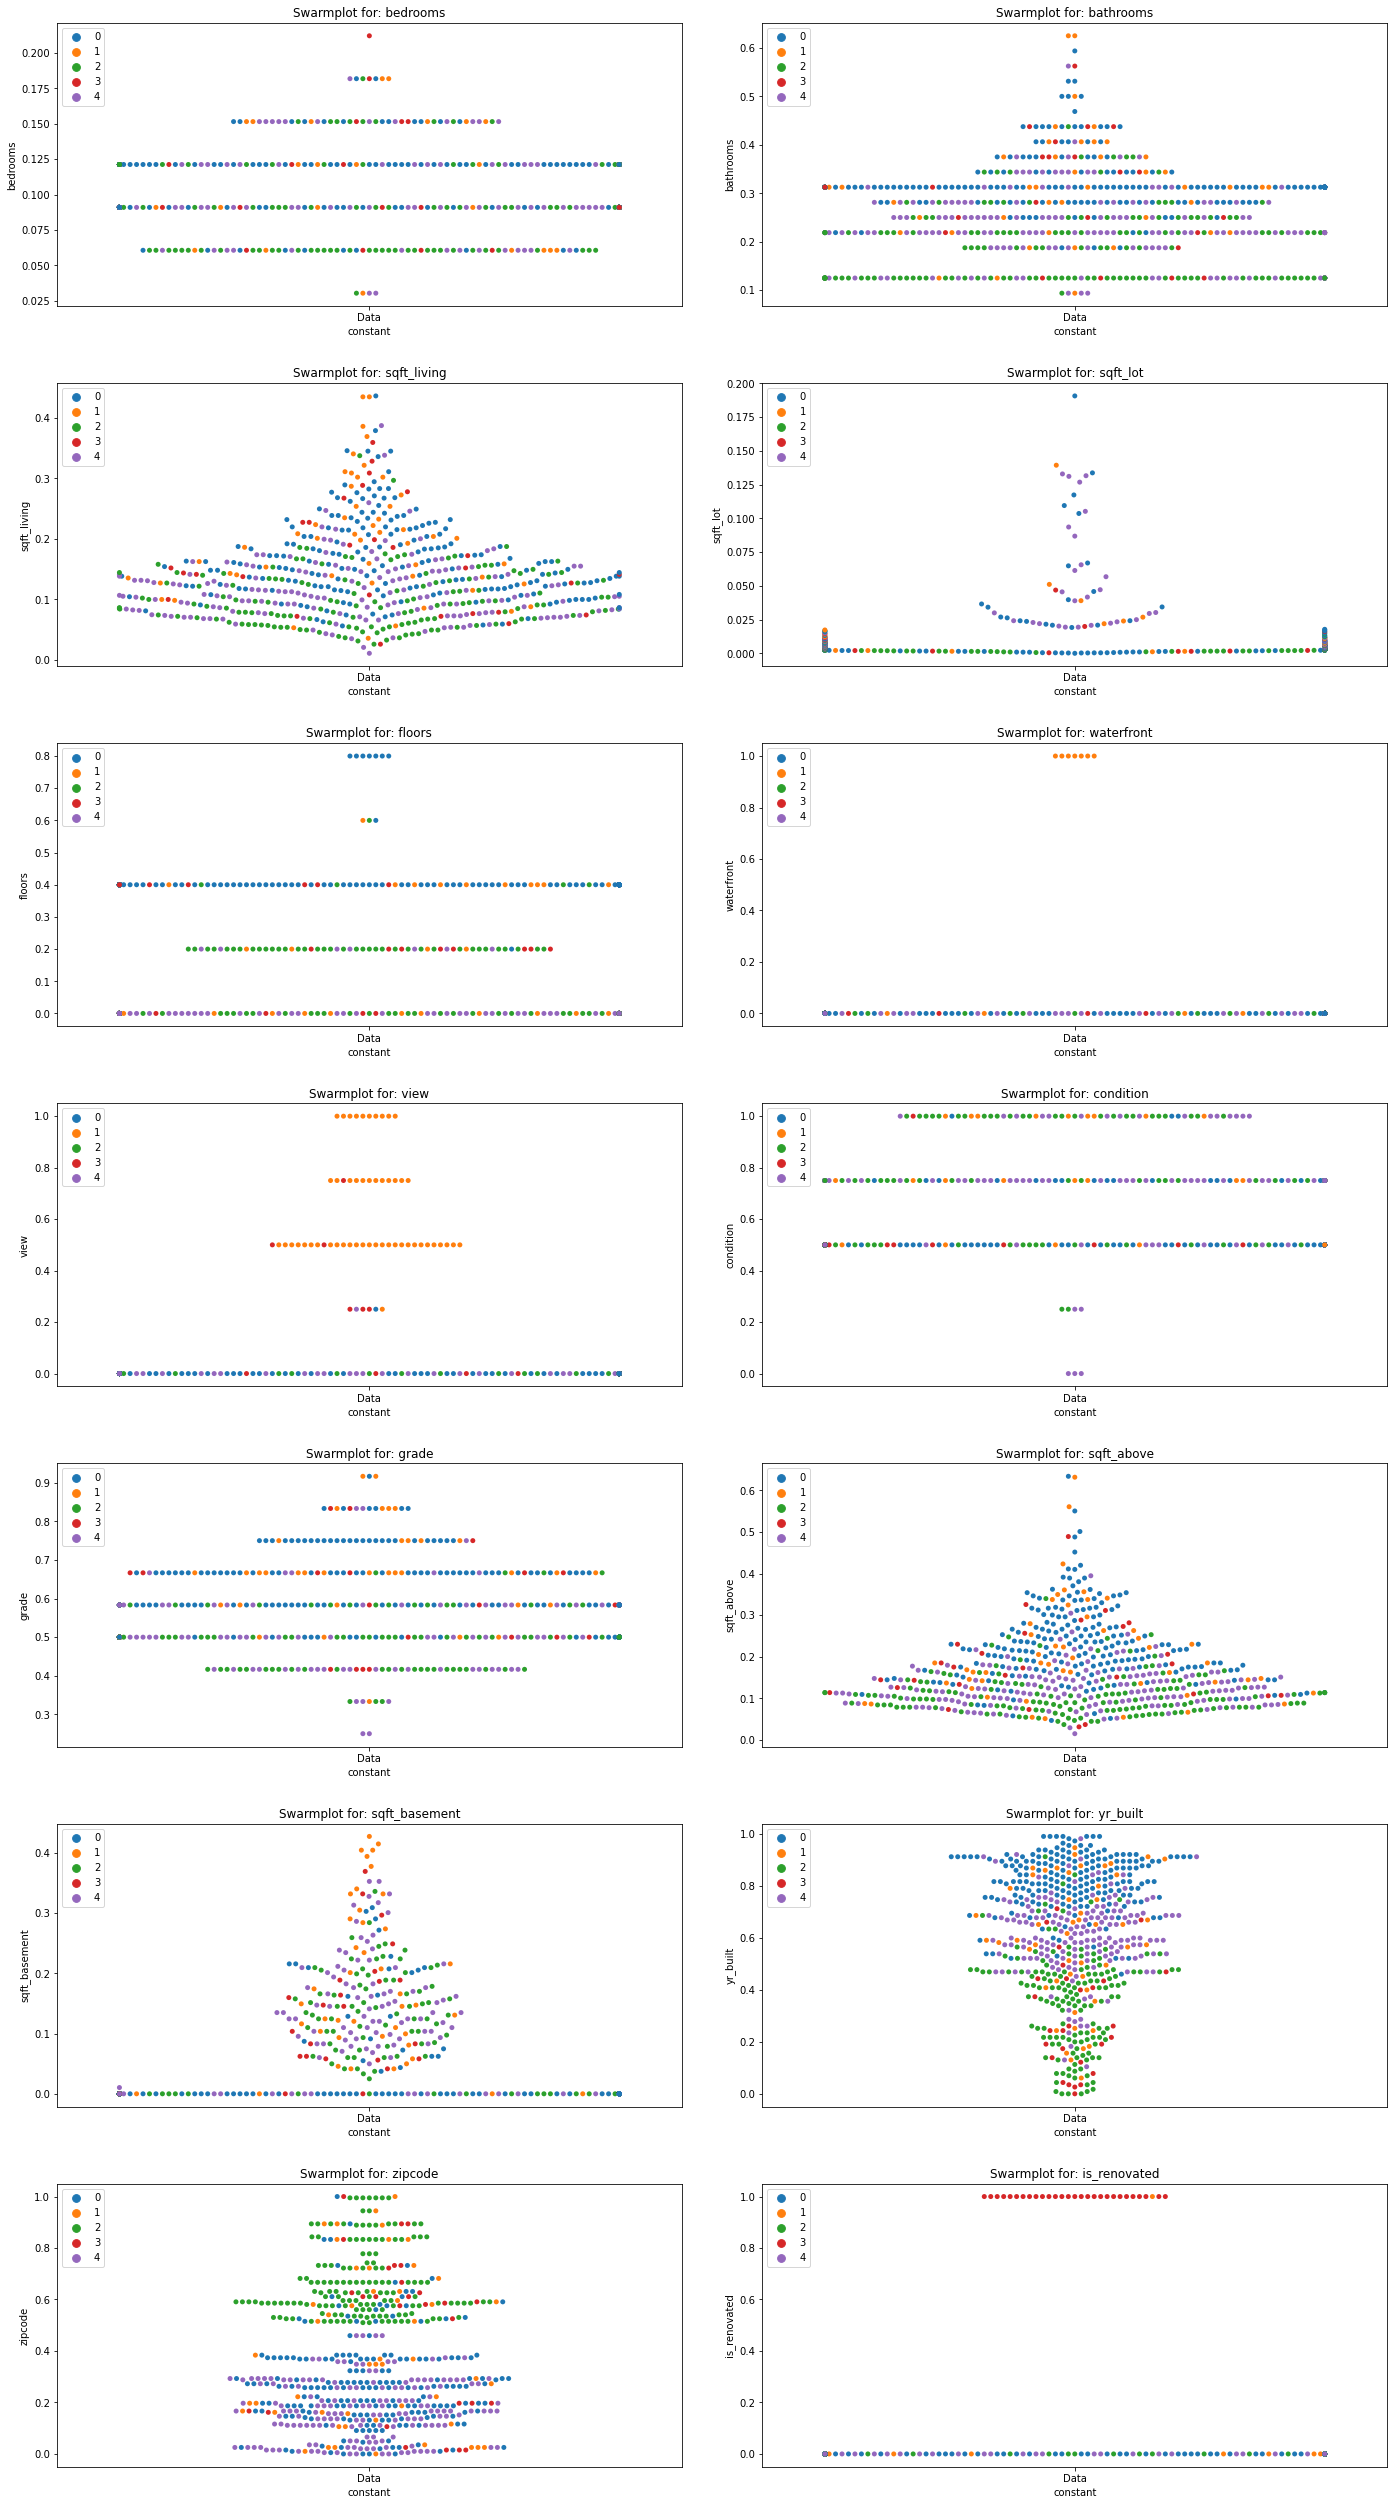

In [33]:
fig = plt.figure(figsize=(20,40))
number_sample = 600
not_used_collumns = ['constant', 'price_cat', 'k_means_clusters','agglomerative_clusters', 'id']
values = normalized_df.drop(not_used_collumns, axis=1).columns
for i,item in enumerate(values):
    plt.subplot(8,2,i+1)
    sns.swarmplot(x=normalized_df['constant'][:number_sample], y=normalized_df[item][:number_sample], hue=normalized_df['agglomerative_clusters'][:number_sample])
    plt.title(f"Swarmplot for: {item}")
    plt.legend(loc='upper left')

fig.tight_layout(pad=3.0)
plt.show()

Again, each cluster nicely separated instances for each attributes.